# ASTRO 501 — HW 1b: DECam Photometry + Calibration + CMD (47 Tuc)

**Goal:** Using raw DECam imaging data in **g** and **r** from the NOIRLAB archive, you will (0) Find and download the requested data, (1) inspect FITS headers, (2) build basic calibrations (bias + flats), (3) apply calibrations to science frames, (4) improve the WCS, (5) detect stars and do aperture photometry, (6) calibrate instrumental magnitudes to an external catalog, and (7) make a **color–magnitude diagram (CMD)** for the field. 

## How to use this notebook
- Every numbered **Plot cell** (P1, P2, …) must produce a figure. **Paste a screenshot of your final figures in a PDF for later submission to Gradescope ** 
- For each plot you include in the PDF, you should include a short explanation (paragraph or few bullet points):
  - What you did (algorithm / method)
  - Key parameter choices (thresholds, apertures, match radius, etc.)
  - Any sanity checks / failure modes
 
NOTE: If you get stuck on some steps, please reach out to Prof. Monnier, post a question on the canvas discussion board, or ask one of your fellow students. You are allowed to use the tutorials, chatgpt, internet resources to help you in this HW, though you should know what the code is doing and how it relates to our class material **

## What you submit
- On gradescope, please upload a PDF with the requested PLOTS (numbered) along with a brief explanation of the procedures used to make the plot.  Explain your workflow and how you used your tools. If your plot doesn't look like the expected one, please try to explain why.
- A completed notebook with your code + brief explanation + screenshots will need to be available for me to access on google drive.  Please post a directory with your files and notebook here: https://drive.google.com/drive/folders/1DSgSdCCDF3gQECt28RenWymF1aW-Q23Z?usp=sharing


In [1]:
%matplotlib inline


Lets do some practical photometry work.

Lets do photometry of the globular cluster 47 Tuc (NGC 104) from data gathered by DECam. We can compare to catalog result.

<img src="HW1b_images/5012eaae-730d-4971-8093-26aede411dfa.png" width="600">

Source: Wikipedia

navigate to https://astroarchive.noirlab.edu/


<img src="HW1b_images/33e899c5-4f88-44b1-b154-b793247f4c17.png" width="600">


Now look at the list thats comes back.  We should select a night with a nice R and G image.  We will just analyze one each and skip stacking multiple frames together for this assignment.  I see some long exposures on UT 2014-06-29 (you can add the UT date to the table list).  The following frames are also of the same field and taken close together in time. 

 Lets download these two: 

<img src="HW1b_images/c8166223-87d7-4848-8248-25a4201bd74d.png" width="900">


so I downloaded these two files (wasn't completely obvious how! so reach out if you get stuck).   I recommend downloading ds9 or saoimage https://sites.google.com/cfa.harvard.edu/saoimageds9/download to help you quicklook at fits files.  here is what the the r-band file looks like:
<img src="HW1b_images/4c0353f0-c5fe-47cc-be5e-c2ae76e99212.png" width="600">


You can click on File -> Header, select the first one, to see the FITS Headers, including the filter (this one is r)

<img src="HW1b_images/99324c3d-e3ee-407f-8017-501087948852.png" width="600">


Next now should look FLATS near the same date UT 2014-06-29.  Now use interface to see if these helper frames were taken on the same date or nearby in time. 

<img src="HW1b_images/1a268426-5943-4e94-9c1e-566a85a292e2.png" width="600">

I found dome flats taken on the same night. Choose one R and G filter.. here is what I chose to download:
<img src="HW1b_images/15e1424d-a69c-4fff-9548-ee9f3965c155.png" width="900">


here is what one looks like in ds9/saoimage -- no stars as expected! but lots of 'flat field structure'.

<img src="HW1b_images/25247a75-16be-42d5-9400-57e6a0ec2265.png" width="600">


Last up the biases. I read that the dark current the cryogenically-cooled DECam is <1 e-/200seconds, so we are pretty safe to ignore the dark current. That makes life easier as we just need find a bias (or master bias) that was taken nearby in time. so lets search for some.

At first I didn't find any 'BIAS' frames, but it seems they called them 'ZERO's... Here is one I found for 2014-0. Note that a bias is taken with no light on detector so they are same for both R and G band observations.

<img src="HW1b_images/14b974ce-0751-4483-bfbc-ab3863176e11.png" width="900">


For this assignment its ok to downloaded only one, but in real analysis you should download many and average/median them together to reduce readnoise!  Here is what it looks like!

<img src="HW1b_images/ea1723c8-bd3b-411a-8388-69d6628c1c04.png" width="600">


Since this is just a HW, I renamed my files to more clear and easy to know what file is what.   (use ds9/saoimage to look at header and images to makes ure you don't confuse which is which!)

data_r.fits.fz

data_g.fits.fz

flat_r.fits.fz

flat_g.fits.fz

bias.fits.fz



## Plot P1: Quicklook at the g-band data (all chips!) *(create the requested figure)*

The next section is just to show that these FITS files are actually pretty complicated.  They have data from >60 detectors! Each one has its own header with information, especially WCS (World Coordinate System astrometry) information. Use the next cell to look at each of your files so you can see the absolutely huge amount of data you got there!! 

Your plot should be a large grid showing a snapshot of each chip with histogram equalization for data_g.fits.fz, similar to this but with all the chips!!

<img src="HW1b_images/8ce2c189-0821-4911-84b3-f35eb46d1dbe.png" width="600">

100%|██████████| 70/70 [00:37<00:00,  1.87it/s]


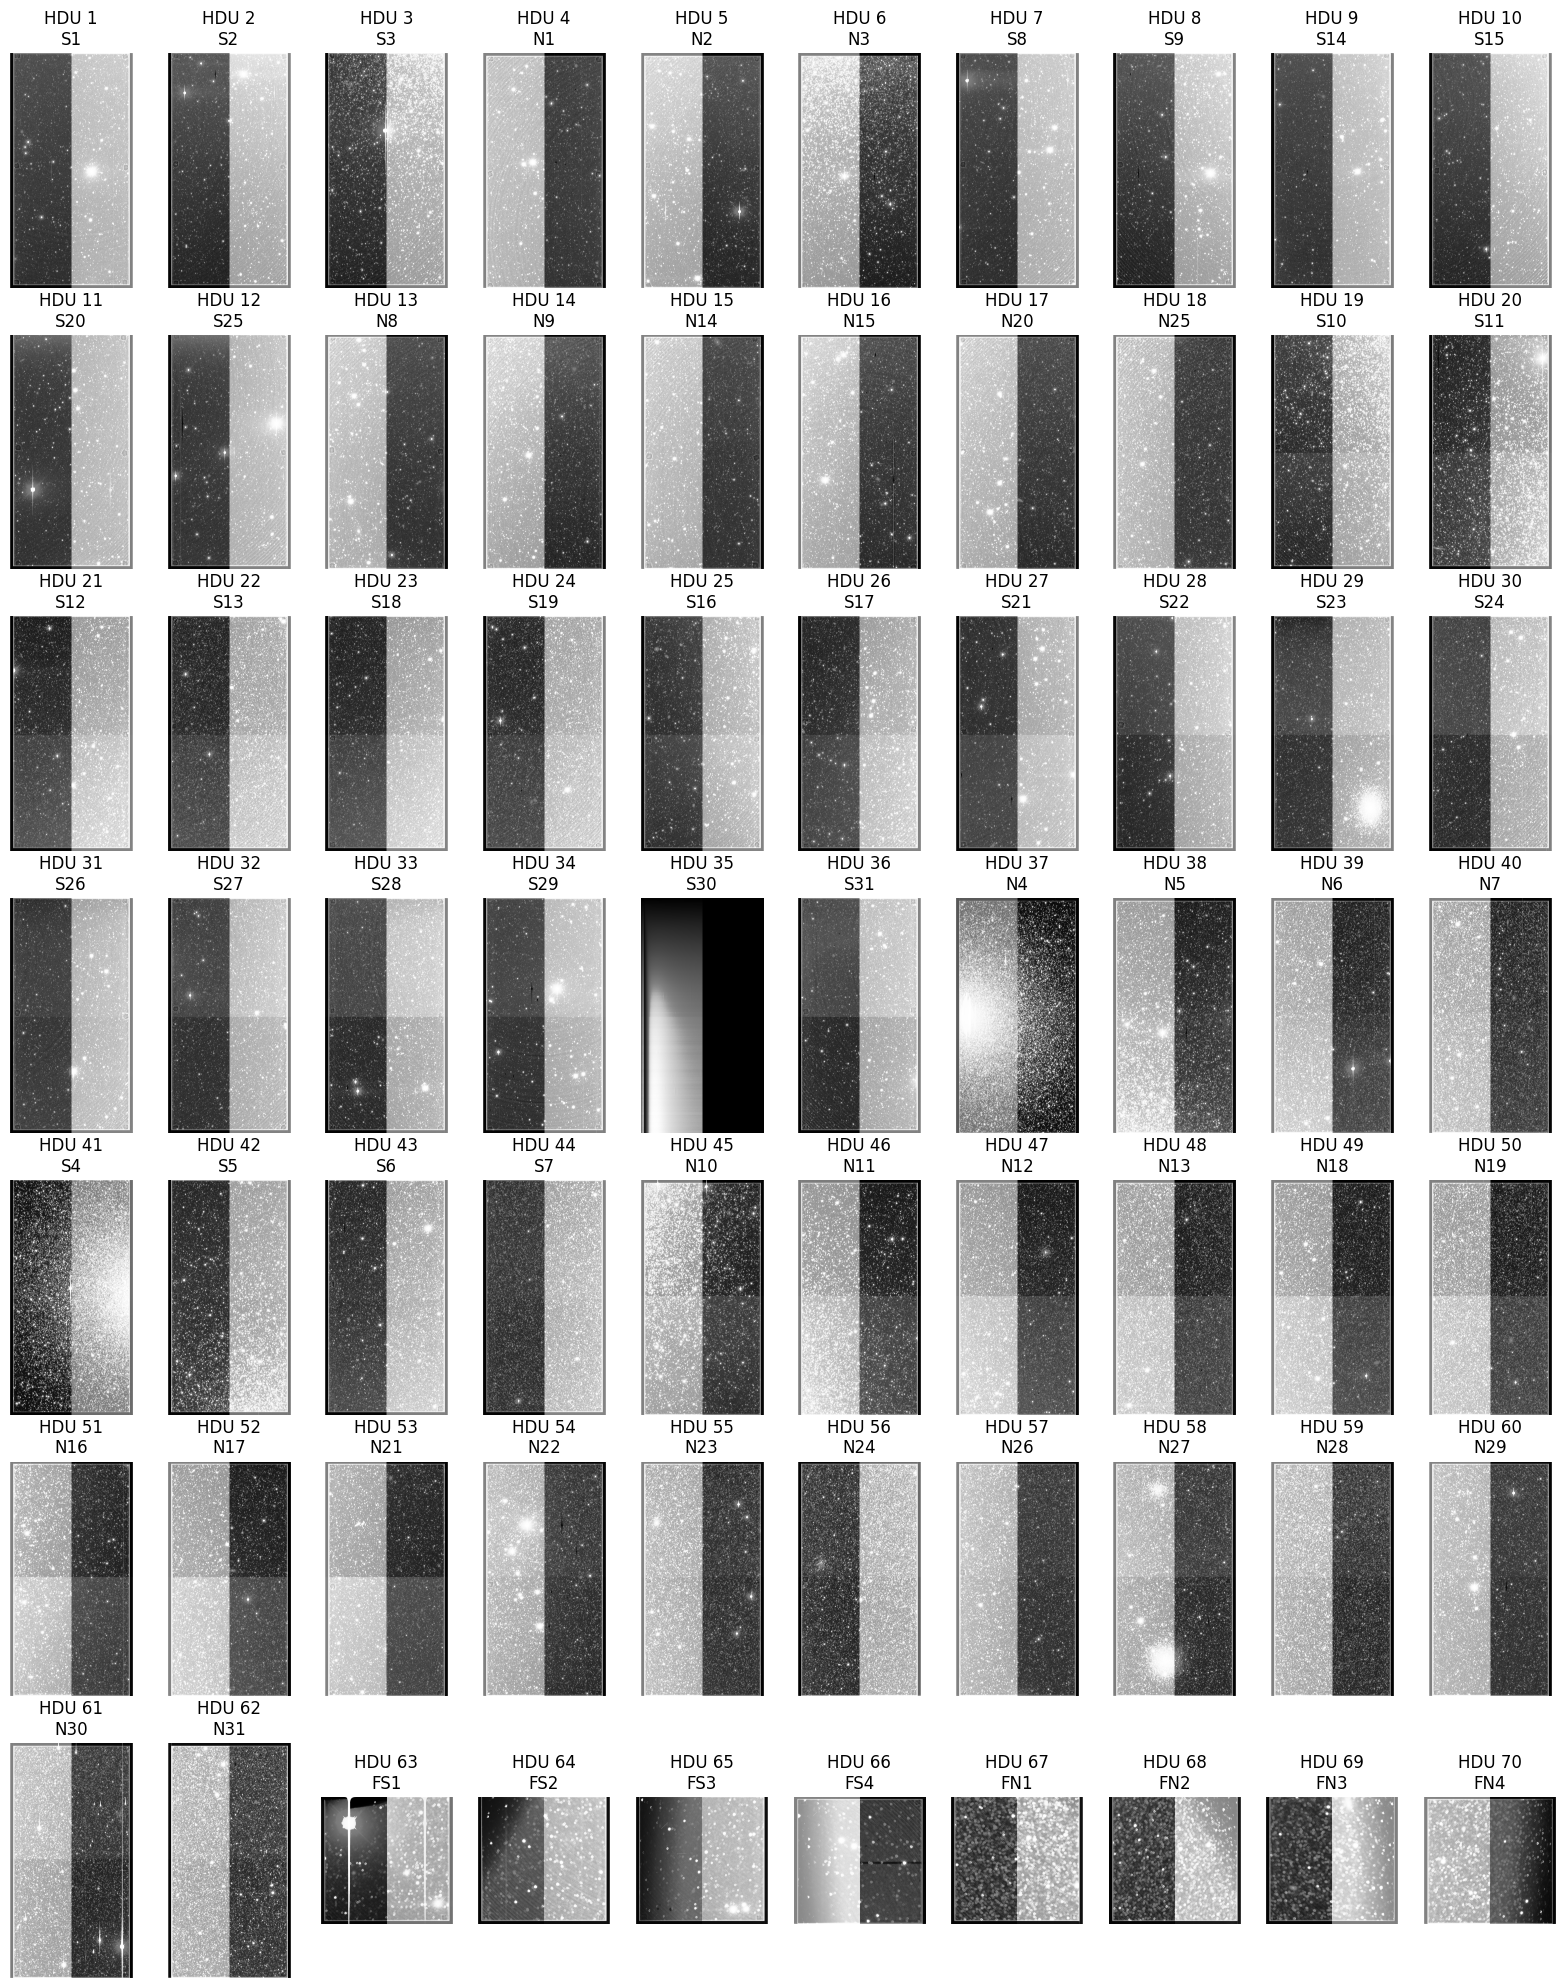

In [24]:
# your code goes here.
from astropy.io import fits

# Open data and look how it's structured
data_g = fits.open("data_g.fits.fz")
#print(data_g.info())
#print(data_g[0].header)

# Plot
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import exposure
from tqdm import tqdm

fig, axes = plt.subplots(7,10, figsize=(20,25))
nrows, ncolumns = axes.shape
for chip in tqdm(range(1,len(data_g))):
    chip_hdu = data_g[chip]
    hist_equalized_img = exposure.equalize_hist(chip_hdu.data)
    #print(chip // ncolumns, chip % ncolumns)
    axes[(chip-1) // ncolumns][(chip-1) % ncolumns].imshow(hist_equalized_img, origin="lower", cmap="gray")
    axes[(chip-1) // ncolumns][(chip-1) % ncolumns].set_title(f"HDU {chip}\n{chip_hdu.name}")
    axes[(chip-1) // ncolumns][(chip-1) % ncolumns].axis("off")
plt.savefig("P1.png")
plt.show()
    


You woudn't necessarily know this is a wide-field camera looking at a cluster from this series of images.  For fun, lets use a script to make a mosaic to see if we can see the cluster. (be patient -- this routine takes many minutes to run).  This might take up too much memory on a laptop... so if the kernel crashed you might need to skip this step.

<img src="HW1b_images/8f3eea07-2b9f-49d6-b5ad-af8b64b9f413.png" width="500">

In [1]:
# provided mosaic code

import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from reproject.mosaicking import find_optimal_celestial_wcs
import matplotlib.pyplot as plt

fname = "data_r.fits.fz"
BIN = 10

def hist_equalize(img, clip_percent=0.5, nbins=4096):
    x = img.astype(np.float64, copy=False)
    m = np.isfinite(x)
    if m.sum() < 100:
        return None

    v = x[m]
    lo, hi = np.percentile(v, [clip_percent, 100.0 - clip_percent])
    if not np.isfinite(lo) or not np.isfinite(hi) or hi <= lo:
        return None

    v = np.clip(v, lo, hi)
    hist, bin_edges = np.histogram(v, bins=nbins, range=(lo, hi))
    cdf = hist.cumsum().astype(float)
    if cdf[-1] == 0:
        return None
    cdf /= cdf[-1]

    idx = np.searchsorted(bin_edges[1:], np.clip(x, lo, hi), side="right")
    idx = np.clip(idx, 0, nbins - 1)

    out = np.full_like(x, np.nan, dtype=float)
    out[m] = cdf[idx[m]]
    return out

def bin_block_mean(a, b=4):
    """Bin by b×b using mean. Trims edges if not divisible."""
    ny, nx = a.shape
    ny2, nx2 = ny // b, nx // b
    a = a[:ny2*b, :nx2*b]
    return a.reshape(ny2, b, nx2, b).mean(axis=(1,3)).astype(np.float32)

def scale_wcs_for_binning(w, b=4):
    """
    Adjust WCS so that binned pixels map correctly.
    For b×b binning: pixel scale increases by b, so CD/CDELT should be multiplied by b.
    CRPIX should be divided by b (approx; see note below).
    """
    w2 = w.deepcopy()

    # Scale CRPIX (pixel coordinates) into binned grid
    # Approximate mapping: new pixel centers correspond to old pixels grouped by b
    w2.wcs.crpix = (w2.wcs.crpix - 0.5) / b + 0.5

    # Scale pixel scale (CD or CDELT)
    if w2.wcs.has_cd():
        w2.wcs.cd *= b
    else:
        # If using PC + CDELT, CDELT carries the scale
        w2.wcs.cdelt *= b

    return w2

# Open file
hdul = fits.open(fname, memmap=False)  # .fz won't truly memmap; keep simple

inputs = []
for hdu in hdul[1:]:
    if hdu.data is None:
        continue
    try:
        w = WCS(hdu.header)
        if not w.has_celestial:
            continue

        data = np.asarray(hdu.data, dtype=np.float32)
        data_b = bin_block_mean(data, BIN)
        w_b = scale_wcs_for_binning(w, BIN)

        inputs.append((data_b, w_b))
    except Exception:
        continue

print(f"Using {len(inputs)} CCDs (binned {BIN}x{BIN})")

# Compute output WCS for the binned inputs (much smaller mosaic)
out_wcs, shape_out = find_optimal_celestial_wcs(inputs)
print("shape_out:", shape_out)

# Streaming coadd to keep peak RAM low
sum_im = np.zeros(shape_out, dtype=np.float32)
sum_wt = np.zeros(shape_out, dtype=np.float32)

for i, (data_b, w_b) in enumerate(inputs, 1):
    reproj, fp = reproject_interp((data_b, w_b), out_wcs, shape_out=shape_out)
    # Accumulate where valid
    m = np.isfinite(reproj) & (fp > 0)
    sum_im[m] += hist_equalize(reproj[m].astype(np.float32))
    sum_wt[m] += fp[m].astype(np.float32)

    # optional progress
    if i % 10 == 0 or i == len(inputs):
        print(f"  reprojected {i}/{len(inputs)}")

mosaic = np.full(shape_out, np.nan, dtype=np.float32)
good = sum_wt > 0
mosaic[good] = sum_im[good] / sum_wt[good]

# Display (no huge intermediate v array)
vmin = np.nanpercentile(mosaic, 5)
vmax = np.nanpercentile(mosaic, 99.5)

plt.figure(figsize=(10, 10))
plt.imshow(mosaic, origin="lower", vmin=vmin, vmax=vmax, cmap="gray")
plt.title(f"DECam mosaic (binned {BIN}x{BIN})")
plt.axis("off")
plt.show()


Using 70 CCDs (binned 10x10)
shape_out: (3249, 2973)


InvalidCoordinateError: ERROR 8 in wcss2p() at line 3966 of file cextern/wcslib/C/wcs.c:
One or more of the pixel coordinates were invalid.
ERROR 6 in linx2p() at line 979 of file cextern/wcslib/C/lin.c:
De-distort error.
ERROR 5 in disx2p() at line 1411 of file cextern/wcslib/C/dis.c:
Convergence not achieved after 30 iterations, residual 2.3e-13.


Awesome.. Now for the rest of the HW, lets just focus on a single chip.   it will be easy to re-run the whole notebook with different chips -- even loop over all them if we wanted. I'll choose lucky 11.

I recommend loading in HDU 11 for the 5 files into 5 arrays, keeping the header and wcd information available for future stseps
You can use the code below or use your own variables.

Print some summary information for each file to make sure everything makes sense, such as:

sci_g  | shape=(4146, 2160) | EXPTIME= 180.0 s | FILTER=g DECam SDSS c0001 4720.0 1520.0 | OBJECT=47Tuc | DATE=2014-06-29T09:38:20.452217
sci_r  | shape=(4146, 2160) | EXPTIME= 120.0 s | FILTER=r DECam SDSS c0002 6415.0 1480.0 | OBJECT=47Tuc | DATE=2014-06-29T09:35:52.005306
flat_g | shape=(4146, 2160) | EXPTIME=  40.0 s | FILTER=g DECam SDSS c0001 4720.0 1520.0 | OBJECT=DomeFlat-g40 | DATE=2014-06-28T20:26:30.809123
flat_r | shape=(4146, 2160) | EXPTIME=  15.0 s | FILTER=r DECam SDSS c0002 6415.0 1480.0 | OBJECT=DomeFlat-r15 | DATE=2014-06-28T20:27:34.948653
bias   | shape=(4146, 2160) | EXPTIME=   0.0 s | FILTER=solid plate 0.0 0.0 | OBJECT= | DATE=2014-06-30T22:41:42.738929

I provide some code you can use to create CCD objects and extract the correct HDU.

Objects now available for next steps:
  sci_g, sci_r, flat_g, flat_r, bias
Each is a CCDData with: .data, .header, .wcs

In [2]:
# You can use this code to export data from one chip.

import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import CCDData

HDUNUM = 11  # the image extension you want

#inputs
files = dict(
    sci_r="data_r.fits.fz",
    sci_g="data_g.fits.fz",
    flat_r="flat_r.fits.fz",
    flat_g="flat_g.fits.fz",
    bias="bias.fits.fz"
)

def load_ccd_ext_with_primary(path: str, ext: int, unit="adu") -> CCDData:
    """
    Load a single MEF extension as CCDData, preserving:
      - WCS from the extension header
      - global metadata from the PRIMARY header
    """
    with fits.open(path, memmap=True) as hdul:
        if ext >= len(hdul):
            raise IndexError(f"{path}: requested HDU {ext}, file has {len(hdul)} HDUs")

        prim_hdr = hdul[0].header.copy()
        hdu = hdul[ext]

        if hdu.data is None:
            raise ValueError(f"{path}: HDU {ext} has no data")

        data = np.array(hdu.data, copy=True)

        # Start from extension header (for WCS), then append PRIMARY keywords
        hdr = hdu.header.copy()
        for key, val in prim_hdr.items():
            if key not in hdr:
                hdr[key] = val

        wcs = WCS(hdu.header)

    return CCDData(data, unit=unit, header=hdr, wcs=wcs)

# --- Load data ---
sci_r  = load_ccd_ext_with_primary(files["sci_r"],  HDUNUM)
sci_g  = load_ccd_ext_with_primary(files["sci_g"],  HDUNUM)
flat_r = load_ccd_ext_with_primary(files["flat_r"], HDUNUM)
flat_g = load_ccd_ext_with_primary(files["flat_g"], HDUNUM)
bias   = load_ccd_ext_with_primary(files["bias"],   HDUNUM)

# Quick sanity prints
def summarize(ccd: CCDData, name: str):
    h = ccd.header

    exptime = h.get("EXPTIME", h.get("EXPTIMEA", "N/A"))
    filt = (
        h.get("FILTER")
        or h.get("FILT_STR")
        or h.get("FILTER1")
        or "N/A"
    )
    obj = h.get("OBJECT", "N/A")
    date = h.get("DATE-OBS", "N/A")

    print(
        f"{name:6s} | shape={ccd.data.shape} | "
        f"EXPTIME={exptime:>6} s | FILTER={filt:>6} | "
        f"OBJECT={obj} | DATE={date}"
    )

summarize(sci_g,  "sci_g")
summarize(sci_r,  "sci_r")
summarize(flat_g, "flat_g")
summarize(flat_r, "flat_r")
summarize(bias,   "bias")
# Objects now available for next steps:
#   sci_g, sci_r, flat_g, flat_r, bias
# Each is a CCDData with: .data, .header, .wcs


sci_g  | shape=(4146, 2160) | EXPTIME= 180.0 s | FILTER=g DECam SDSS c0001 4720.0 1520.0 | OBJECT=47Tuc | DATE=2014-06-29T09:56:20.156549
sci_r  | shape=(4146, 2160) | EXPTIME= 120.0 s | FILTER=r DECam SDSS c0002 6415.0 1480.0 | OBJECT=47Tuc | DATE=2014-06-29T09:35:52.005306
flat_g | shape=(4146, 2160) | EXPTIME=  40.0 s | FILTER=g DECam SDSS c0001 4720.0 1520.0 | OBJECT=DomeFlat-g40 | DATE=2014-06-28T20:26:30.809123
flat_r | shape=(4146, 2160) | EXPTIME=  15.0 s | FILTER=r DECam SDSS c0002 6415.0 1480.0 | OBJECT=DomeFlat-r15 | DATE=2014-06-28T20:27:34.948653
bias   | shape=(4146, 2160) | EXPTIME=   0.0 s | FILTER=solid plate 0.0 0.0 | OBJECT= | DATE=2014-06-30T22:41:42.738929


## Plot P2: Quicklook at the calibrated flats *(create the requested figure)*

Next lets subtract bias from flats and sci frames. 

Next we need normalize the flats by the median (report the value) and plot a histogram and image to characterize the flats.  Note that if we reduced multiple flats we could not only average them together to  improve quality but also look at the rms variation to estimate the flat field errors.  

FITS headers will often tell you the gain of the system, here GAINA = 3.92 e-/adu, and GAINB=3.73 e-/ADU.  Going forward I will just GAIN=3.9.
With the median flat level, we can multiple by the gain to estimate the # of photon-electrons, which can help with signal-to-noise estimates later in the processing.

Your submitted plot P2 should look something like this.

<img src="HW1b_images/6d43f3f8-eac6-4476-bebb-ddb632dedc41.png" width="600">


Gain: 3.8209999999999997 e/ADU
Flat g median: 13830.0 ADU = 52844.42999999999 e
Flat r median: 19124.0 ADU = 73072.80399999999 e


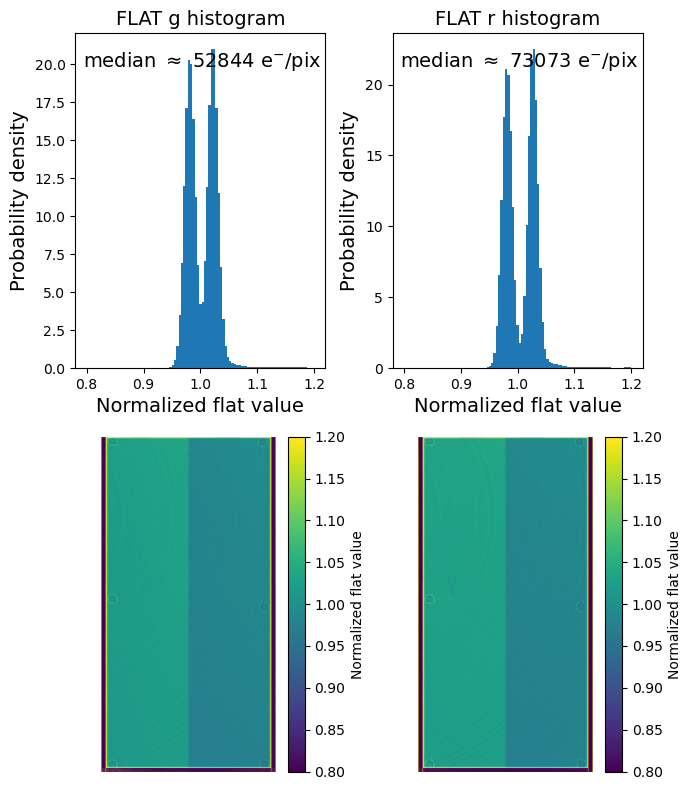

In [38]:
# your code goes here.

sci_g_bias_substracted = sci_g.data-bias.data
sci_r_bias_substracted = sci_r.data-bias.data
flat_g_bias_substracted = flat_g.data-bias.data
flat_r_bias_substracted = flat_r.data-bias.data

flat_median_g = np.median(flat_g_bias_substracted)
flat_median_r = np.median(flat_r_bias_substracted)

gain = (flat_g.header["GAINA"]+flat_g.header["GAINB"])/2 # e/ADU
print(f"Gain: {gain} e/ADU")

print(f"Flat g median: {flat_median_g} ADU = {flat_median_g*gain} e")
print(f"Flat r median: {flat_median_r} ADU = {flat_median_r*gain} e")

# Normalize flats
flat_median_g_norm = flat_g_bias_substracted/flat_median_g
flat_median_r_norm = flat_r_bias_substracted/flat_median_r

# Calculate histograms
hist_edges = np.linspace(0.8,1.2,100)
flat_g_hist_vals, bin_edges = np.histogram(flat_median_g_norm, bins=hist_edges, density=True)
flat_r_hist_vals, bin_edges = np.histogram(flat_median_r_norm, bins=hist_edges, density=True)
import matplotlib.colors as colors
norm = colors.Normalize(vmin=0.8, vmax=1.2)
fig, axes = plt.subplots(2,2, figsize=(7,8))
for i, f in enumerate("gr"):
    axes[0][i].stairs(flat_g_hist_vals if f=="g" else flat_r_hist_vals, bin_edges, fill=True)
    axes[0][i].set_xlabel("Normalized flat value", fontsize=14)
    axes[0][i].set_ylabel("Probability density", fontsize=14)
    axes[0][i].set_title(f"FLAT {f} histogram", fontsize=14)
    ymin, ymax = axes[0][i].get_ylim()
    xmin, xmax = axes[0][i].get_xlim()
    axes[0][i].text(xmin+(xmax-xmin)*0.03, ymax-(ymax-ymin)*0.1, rf"median $\approx$ {(flat_median_g if f=="g" else flat_median_r)*gain:.0f} "+r"e$^{-}/$pix", fontsize=14)
    flat_plot = axes[1][i].imshow(flat_median_g_norm if f=="g" else flat_median_r_norm, cmap="viridis", norm=norm, origin="lower")
    fig.colorbar(flat_plot, label="Normalized flat value")
    axes[1][i].axis("off")
plt.tight_layout()
plt.savefig("P2.png")
plt.show()

## Plot P3: Look at the processed g-band r-band science frames (bias-corrected and flatfielded). *(create the requested figure)*

Next we apply bias and flatfield to our science frames. We can now measure the typical background level and compare how the raw data vs processed frames look.  Please show histogram-equalized and linear presentations.  Should look similar to below:

Final Image = (RAW DATA - BIAS) / (NORMALIZED FLAT)

Note that we should clip outlier points to unity in the flat field to account for bad pixels.  You can use the code in the next cell or write your own to help with this.  Be sure to clip those crazy points away BEFORE dividing your science images by the flat field.

<img src="HW1b_images/c7689221-8c62-40a1-80b0-01855a35232b.png" width="600">
<img src="HW1b_images/2564b7a6-b31c-44f2-ab46-dc8afaa43004.png" width="600">



In [42]:
# you can use this if you want.

def clip_flat_to_unity(flat_norm, lo=0.7, hi=1.3):
    """Return a copy of normalized flat with values outside [lo,hi] set to 1.0."""
    f = np.array(flat_norm, dtype=np.float64, copy=True)
    print(flat_norm.shape)
    m = np.isfinite(f)
    bad = m & ((f < lo) | (f > hi))
    f[bad] = 1.0
    # Also replace non-finite with 1.0
    f[~m] = 1.0
    return f, bad.sum()
flat_g_n = flat_median_g_norm
flat_r_n = flat_median_r_norm
flat_g_clip, nbad_g = clip_flat_to_unity(flat_g_n, lo=0.7, hi=1.3)
flat_r_clip, nbad_r = clip_flat_to_unity(flat_r_n, lo=0.7, hi=1.3)

print(f"Flat g: set {nbad_g:,} pixels to 1.0 (outside [0.7, 1.3] or non-finite)")
print(f"Flat r: set {nbad_r:,} pixels to 1.0 (outside [0.7, 1.3] or non-finite)")

(4146, 2160)
(4146, 2160)
Flat g: set 672,603 pixels to 1.0 (outside [0.7, 1.3] or non-finite)
Flat r: set 673,065 pixels to 1.0 (outside [0.7, 1.3] or non-finite)


223.0
221.9046204130144


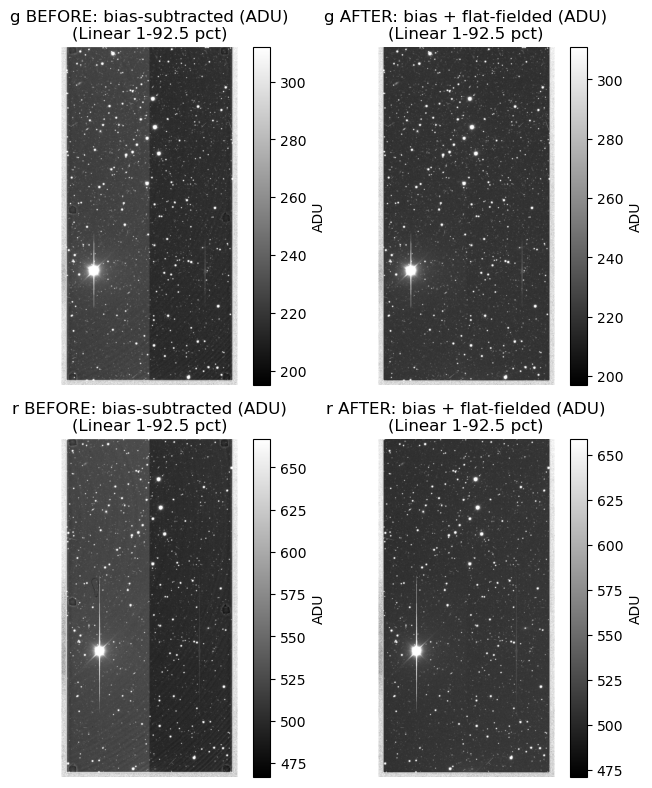

In [72]:
# your code goes here.
sci_g_b = sci_g_bias_substracted
sci_r_b = sci_r_bias_substracted
sci_g_bf = sci_g_b/(flat_g_clip)
sci_r_bf = sci_r_b/(flat_r_clip)
sci_g_bf = CCDData(sci_g_bf, wcs=sci_g.wcs, unit=sci_g.unit, meta=sci_g.meta)
sci_r_bf = CCDData(sci_r_bf, wcs=sci_g.wcs, unit=sci_g.unit, meta=sci_g.meta)
print(np.median(sci_g_b.data))
print(np.median(sci_g_bf.data))
fig, axes = plt.subplots(2,2, figsize=(7,8))
import matplotlib.colors as colors
for i, f in enumerate("gr"):
    norm = colors.Normalize(vmin=np.quantile(sci_g_b.data if f=="g" else sci_r_b.data, 0.01), vmax=np.quantile(sci_g_b.data if f=="g" else sci_r_b.data, 0.925), clip=True)
    before_plot = axes[i][0].imshow(sci_g_b.data if f=="g" else sci_r_b.data, cmap="gray", origin="lower", norm=norm)
    fig.colorbar(before_plot, label="ADU")
    axes[i][0].axis("off")
    axes[i][0].set_title(f"{f} BEFORE: bias-subtracted (ADU)\n(Linear 1-92.5 pct)")
    norm = colors.Normalize(vmin=np.quantile(sci_g_bf.data if f=="g" else sci_r_bf.data, 0.01), vmax=np.quantile(sci_g_bf.data if f=="g" else sci_r_bf.data, 0.925), clip=True)
    after_plot = axes[i][1].imshow(sci_g_bf.data if f=="g" else sci_r_bf.data, cmap="gray", origin="lower", norm=norm)
    fig.colorbar(after_plot, label="ADU")
    axes[i][1].axis("off")
    axes[i][1].set_title(f"{f} AFTER: bias + flat-fielded (ADU)\n(Linear 1-92.5 pct)")
plt.tight_layout()
plt.savefig("P3.png")
plt.show()

I noticed above there is a kind of black border on the chip (presumaby an overscan region). Lets crop these images before saving as clean fits files to use in the rest of the analysis.  I will multiple allthe values by GAIN so the the pixel values are in e- (photo-electons) to make future error analysis easier.

I include some code below that will extract the headers and data from the earlier variables (sci_g_b (CCData object), sci_g_ff (2d numpy array),sci_r_b (CCDData Object),sci_r_ff (2d numpy array)) and remove a 75pixel border, then save new fits with the required header keywords and WCS data.

You can do this yourself if you prefer but use the following file names. Its important to maintain the header keywords and WCS information for the next steps.

New names:

sci_g_biasflat_hdu11.fits

sci_r_biasflat_hdu11.fits

In [73]:
# Save bias+flat-fielded science frames as FITS with headers + WCS
# Assumes you already have: sci_g_b, sci_r_b (CCDData), sci_g_ff, sci_r_ff (numpy arrays)
# and that sci_g_b.header / sci_r_b.header already include primary keywords + per-chip WCS.

# also removes blank border.

border=75 # remove due to overscan region
from astropy.io import fits
from astropy.nddata import CCDData
import numpy as np

def save_ccd_as_fits(ccd_template: CCDData, data_array: np.ndarray, outpath: str,
                     overwrite: bool = True, add_history: str | None = None, border=20, gain=1.0):
    """
    Save data_array to a FITS file using ccd_template.header (includes WCS cards).
    Writes a simple PrimaryHDU FITS with the merged header so downstream tools see WCS easily.
    """
    hdr = ccd_template.header.copy()

    # Update a couple of standard cards (optional but helpful)
    hdr["BUNIT"] = (str(getattr(ccd_template.unit, "to_string", lambda: str(ccd_template.unit))()),
                    "Data units")
    if add_history:
        hdr["HISTORY"] = add_history

    # Ensure float32 output to keep size reasonable (change to float64 if you prefer)
    data_out = gain*np.asarray(data_array, dtype=np.float32)
    if border > 0: 
        data_out=data_out[border:-border,border:-border]
    hdu = fits.PrimaryHDU(data=data_out, header=hdr)
    hdu.writeto(outpath, overwrite=overwrite)
    print(f"Wrote: {outpath}")

# --- write files ---
save_ccd_as_fits(
    ccd_template=sci_g_bf,
    data_array=sci_g_bf.data,
    outpath="sci_g_biasflat_hdu11.fits",
    add_history="Bias-subtracted, flat-fielded; multipled by gain",
    border=border, gain=gain
)

save_ccd_as_fits(
    ccd_template=sci_r_bf,
    data_array=sci_r_bf.data,
    outpath="sci_r_biasflat_hdu11.fits",
    add_history="Bias-subtracted, flat-fielded; multipled by gain",
    border=border, gain=gain
)


Wrote: sci_g_biasflat_hdu11.fits
Wrote: sci_r_biasflat_hdu11.fits


## Plot P4: Check astrometry of the data frames *(create the requested figure)*

Great job so far. Unfortunately, raw astronomical images rarely have a perfectly accurate **WCS (World Coordinate System)** in the FITS header. Telescope pointing can drift, optics and filters can introduce small static offsets, and distortion models are often imperfect until a later astrometric calibration step.

In this task you will **evaluate the quality of the WCS** by comparing the FITS header astrometry against a trusted external catalog (**Gaia DR3**).

---

### What you will do (high-level plan)

1. **Load the g-band science image** and construct a `WCS` object from its FITS header.
2. **Find the sky coordinate of the chip center** using the WCS:
   - Compute the center pixel location `(x_center, y_center)` from the image shape.
   - Use the WCS to convert that pixel position into a sky coordinate (RA, Dec).
3. **Estimate the field of view (FoV) of the chip** to define the Gaia query radius:
   - Compute the half-diagonal of the chip in pixels.
   - Convert this to an angular radius using an approximate pixel scale (DECam is ~0.26 arcsec/pixel).
   - Add a modest safety margin (e.g., 20%) so the Gaia query fully covers the chip.
4. **Query Gaia DR3** around the chip center: Vizier code for this is I/355/gaiadr
   - Select only **bright sources** (e.g., `G < 18.5`) to avoid severe crowding.
   - If necessary, limit to the *N* brightest Gaia sources.
5. **Convert Gaia sky coordinates to image pixel coordinates**:
   - Use the same WCS and `world_to_pixel()` to predict pixel positions `(x, y)` for each Gaia source.
6. **Create the overlay plot**:
   - Display the full g-band image.
   - Overlay **open circles** at the Gaia-predicted pixel locations.
   - Do not zoom; show the entire chip for simplicity.

---

### What to look for (interpretation)

- If the Gaia circles land **directly on top of stars**, the WCS is likely accurate.
- If the circles are consistently offset by a fixed amount, this indicates a **pointing offset**.
- If the offset varies across the chip (good in the center, worse toward the edges), this suggests **distortion, rotation, or scale errors** in the WCS.

---



Your plot should look something like this:

<img src="HW1b_images/6d4d5933-90c3-4aec-b46a-25a3fddbc671.png" width="600">


Filename: sci_g_biasflat_hdu11.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  S20           1 PrimaryHDU     250   (2010, 3996)   float32   
1005.0 1998.0
Center RA:  4.058806581359804 deg
Center Dec: -71.49301808690446 deg
FOV radius: 581.4956237152608" = 0.161526562143128 deg
Number of Gaia sources: 325


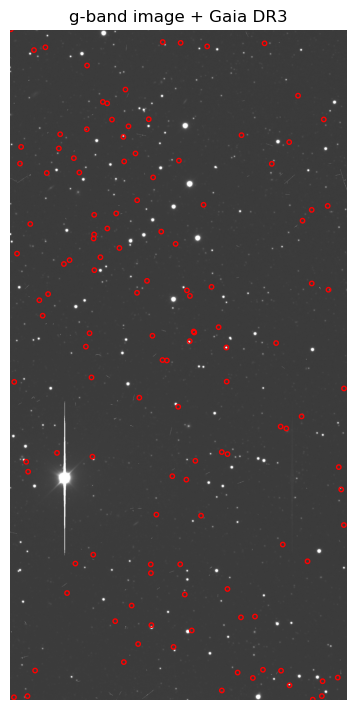

In [101]:
# your code goes here.

from astropy.io import fits
from astropy.wcs import WCS

# Open the FITS file
sci_g_hdu11 = fits.open("sci_g_biasflat_hdu11.fits")
sci_g_hdu11.info()
# Assume the science image is in the primary HDU
data = sci_g_hdu11[0].data
header = sci_g_hdu11[0].header

# Construct WCS from the FITS header
wcs = WCS(header)

# Find sky coordinates of chip center:
ny, nx = data.shape
x_center = nx / 2
y_center = ny / 2
print(x_center, y_center)

from astropy.coordinates import SkyCoord
# Convert pixel to world coordinates
skycoord = wcs.pixel_to_world(x_center, y_center) # When truncating that 75 pixel band around the image, this offset the whole image, so I suspect the offset isn't a pointing error, but a data analysis error.
# Extract RA and Dec
ra_center = skycoord.ra
dec_center = skycoord.dec
print(f"Center RA:  {ra_center}")
print(f"Center Dec: {dec_center}")

half_diag_pix = 0.5 * np.sqrt(nx**2 + ny**2)
pix_scale = 0.26  # pixel scale of DECam in arcsec / pixel
radius_arcsec = half_diag_pix * pix_scale
radius_deg = radius_arcsec / 3600.0
print(f'FOV radius: {radius_arcsec}" = {radius_deg} deg')

from astroquery.vizier import Vizier
import astropy.units as u
skycoord_center = SkyCoord(
    ra=ra_center,
    dec=dec_center,
    frame="icrs"
)
v = Vizier(
    columns=["RA_ICRS", "DE_ICRS", "Gmag"],
    column_filters={"Gmag": "<18.5"},
    row_limit=-1 # no hard row limit (otherwise it's 50)
)
result = v.query_region(
    skycoord_center,
    radius=radius_deg * 1.2 * u.deg,
    catalog="I/355/gaiadr3"
)
gaia = result[0]
print(f"Number of Gaia sources: {len(gaia)}")
N = 325  # keep only top brightest sources
gaia.sort("Gmag")
gaia = gaia[:N]
gaia_coords = SkyCoord(
    ra=gaia["RA_ICRS"],
    dec=gaia["DE_ICRS"],
    frame="icrs"
)

# We can now convert them to pixels:
x_gaia, y_gaia = wcs.world_to_pixel(gaia_coords)
# And even add these as columns to the gaia table:
gaia["x_pix"] = x_gaia
gaia["y_pix"] = y_gaia
fig = plt.figure(figsize=(6,7))

norm = colors.Normalize(vmin=0, vmax=np.quantile(data, 0.997), clip=True)
plt.imshow(data, origin="lower", cmap="gray",norm=norm)
plt.scatter(x_gaia, y_gaia, s=10, edgecolor="red", facecolor="none")
plt.axis("off")
plt.title("g-band image + Gaia DR3")
plt.tight_layout()
plt.xlim(0,data.shape[1])
plt.ylim(0,data.shape[0])
plt.savefig("P4.png")
plt.show()

You can see that there is a large error in the astrometry that is mostly just an angular shift. We need to fix before continuing.

Next we need to use a tool to solve a good WCS solution to allow accurate astrometry. This is needed for matching stars on our r,g images and to compare to catalogs for zero point determination. Feel free to investigate options for doing this, but I suggest one here.

You can use https://nova.astrometry.net/upload to solve for wcs header info for each filter.  You can also install it on your local machine, though more difficult if you only use it occasionally but much better if you want to use via python routinely. For example, you'd need to automate the WCS solution step if you wanted to image all the chips in your original fits file.

After astrometry.net finished, I downloaded the new-image.fits and renamed to be:

sci_g_biasflat_hdu11_astro.fits

sci_r_biasflat_hdu11_astro.fits



## Plot P5: Check astrometry of the new frames with good WCS *(create the requested figure)*

Ok. lets now use the new files and make g- and r-band plots to make sure the astrometry is good!

Here is what it should look like:

<img src="HW1b_images/2059a92f-dfeb-4ec5-9926-23f794cad348.png" width="600">


In [ ]:
# your code goes here.


## Plot P6: Estimate seeing FWHM of images *(create the requested figure)*

ok. next we are going to carryout aperture photometry using photutils package from the cleaned images. 
Here we open the cleaned files with good astrometry and measure the fwhm of the point-spread-function to help with defining apertures.

You can take whatever approach you want here: e.g., fit a representative star and assume its the same for all stars, inspect pixel values by eye using ds9, or you could try an automated procedure (chatgpt can help). In any case, just explain your method and report your FWHM in pixels and arcsec for both g and/or r band.  Your plot should contain a zoomed up image of a star and indicate the FWHM in some way. Be sure not to choose a saturated star because the fhwm will not be representative.

In the next cell I include some code that subtracts the background on the data (arrays r,g) to make it a bit easer to estimate the FWHM.

Your plot should look something like this


<img src="HW1b_images/d4386cb6-58ac-4056-a18f-aca147dcaf8d.png" width="900">

In [ ]:
# Example o fusing photutils to subtract the background from imges.

from photutils.background import Background2D, MedianBackground

def subtract_background(img, box_size=64, filter_size=3, exclude_percentile=10):
    bkg = Background2D(
        img, box_size=box_size, filter_size=filter_size,
        bkg_estimator=MedianBackground(),
        exclude_percentile=exclude_percentile
    )
    return img - bkg.background, bkg

r_sub, bkg_r = subtract_background(r_data, box_size=64)
g_sub, bkg_g = subtract_background(g_data, box_size=64)

print("Background medians (e-):",
      "r", np.median(bkg_r.background), "g", np.median(bkg_g.background))




In [ ]:
# your code goes here.


## Plot P7: Find and mark all the unsaturated and isolated stars *(create the requested figure)*

Now use python library photutils (DAOStarFinder) to find stars (don't do aperture photometry yet). Adjust threshold (I used 7-sigma above background) and inspect the image with marked stars to make sure you are confident in the identifications.  You should notice that many of the stars are too close together for reliable aperture photometry and some saturated stars are included.  If you can, remove stars that are closer than 5*FWHM from another star and remove stars with peaks > 50% of the maximum star. 

In your answer, please include how objects you have included up to this step.

Your plot should look something like this:

<img src="HW1b_images/b6d6e799-8315-4c29-beab-70324dbce9c0.png" width="600">



In [ ]:
# your code goes here.


## Plot P8: First pass of aperture photometry *(create the requested figure)*

Now using these stars, lets carry out aperture photometry using the following parameters:

r_ap  = 1.5 * FWHM

r_in  = 2.5 * FWHM

r_out = 3.5 * FWHM

Your figure should look somethign like this. Notice still some outliers and bad data.

<img src="HW1b_images/036d4811-9c84-42a2-8325-6a735fde3934.png" width="600">

In [ ]:
# your code goes here.


## Plot P9: Second pass of aperture photometry *(create the requested figure)*

Next step is to cross match the r and g-band objects so we can match them.  Some objects won't have matches due to artifacts such as bad pixels or cosmic rays so this should help purify our sample.   Next you should match your objects and replot the aperture flux vs peak flux to see if the data is cleaner now.

For me, there are still about 3 outliers with negative aperture flux.. I have tried adjusting some thresholds and cuts to improve this but haven't been able to remove these so moving on to next step.

<img src="HW1b_images/d612db2c-bdfd-4e44-9e51-0753ebf2c8f5.png" width="600">

In [ ]:
# your code goes here.


## Plot P10: Zeropoint Calibration using an external catalog *(create the requested figure)*

Here we will convert instrumental aperture fluxes (in e- or ADU) measured from the DECam images into **calibrated magnitudes**. We do this using using an external, well-characterized stellar catalog and assess the quality of the calibration using diagnostic plots.

---

### Catalog Used
We calibrate against the **SkyMapper Southern Survey (SMSS) DR4**, accessed via VizieR catalog:

- **Catalog ID:** `II/379/smssdr4`
- **Magnitudes used:** PSF magnitudes in **g** and **r** (e.g., `gPSF`, `rPSF`). These are AB Magnitudes.
- SkyMapper is well suited here because:
  - It covers the southern sky (including 47 Tuc)
  - Its filter system is similar to SDSS/DECam
  - It provides homogeneous photometry down to faint magnitudes

---

### Step-by-Step Zeropoint Calibration Procedure

We have already done the first step needed to calibrate our photometry:

#### 1. Measure instrumental fluxes
For each detected star in the DECam chip:
- Measure a **background-subtracted net aperture flux** \(F\) in ADU
- This is already done.

---

#### 2. Match detected stars to SkyMapper
Using the WCS information in the FITS headers:
- Convert pixel coordinates \((x, y)\) to sky coordinates (RA, Dec)
- Query SkyMapper DR4 around the field center
- Match stars using a small matching radius (typically \(\sim 1^{\prime\prime}\))

Only stars with reliable matches and positive fluxes are used for calibration.

---

#### 3. Compute a zeropoint for each matched star
For each matched star, compute an individual zeropoint:

\[
ZP_i = m_{\rm cat} + 2.5 \log_{10}(F_i)
\]

where:
- \(m_{\rm cat}\) is the SkyMapper catalog magnitude (g or r)
- \(F_i\) is the measured net aperture flux (ADU)

This is done separately for the **g** and **r** bands.

---

#### 4. Adopt the image zeropoint
- Take the **median** of all \(ZP_i\) values as the zeropoint for the image:
\[
ZP = \mathrm{median}(ZP_i)
\]
- The **scatter** in \(ZP_i\) provides a quick quality check:
  - Large scatter or trends usually indicate blends, saturation, mismatches, or poor background subtraction

---

#### 5. Apply the zeropoint to all stars
Once the zeropoint is known, convert any measured flux \(F\) into a calibrated magnitude:
\[
m = ZP - 2.5 \log_{10}(F)
\]

This gives calibrated **g** and **r** magnitudes for *all* detected stars, not just those matched to the catalog.

---

### Diagnostic Plots You Should Examine

To validate the calibration, you should produce the following plots (see below for what I got):

1. **Aperture flux vs catalog magnitude**
   - One panel for **g**, one for **r**
   - Bright stars should have large fluxes
   - Deviations or curvature often indicate saturation or non-linearity

2. **Zeropoint  vs catalog magnitude**
   - Plot ZP_i vs catalog magnitude
   - A flat distribution centered around the median indicates a good calibration
   - Trends with magnitude often signal systematic photometric issues

These plots are essential for assessing whether the zeropoint calibration is trustworthy.

<img src="HW1b_images/692daf14-3a4a-430b-a69f-0e7f46032508.png" width="800">


In [ ]:
# your code goes here.


## Plot P11: Color-magnitude Diagram *(create the requested figure)*

OK. so now lets finish up by plotting a color-magnitude diagram. The Y axis is similar to luminosity and X axis is like temperature.

I had hoped we'd see a clear stellar sequence but this flanking field has too much contamination. The core of cluster would be better but the blending is too severe for aperture photometry I suspect. 

It should look like thisL

<img src="HW1b_images/bd700286-af4c-4b0e-88c3-ed8693adfa5a.png" width="500">

In [ ]:
# your code goes here.


## Congratulations you finished. 